wlcstat - Statistics Package for the Wormlike Chain Model
===============================================

In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import wlcstat.wlcave as wlcave
import wlcstat.wlcgreen as wlcgreen
import wlcstat.wlcstruc as wlcstruc
import wlcstat.poly_dyn as poly_dyn
import wlcstat.wlc_lcpoly as wlc_lcpoly
import wlcstat.poly_confine as poly_confine


#from wlcstat.wlcave import *
#from wlcstat.wlcgreen import *

Demonstrate functions within the 'wlcave' module

In [3]:
import importlib
importlib.reload(wlcave)
importlib.reload(wlcgreen)
importlib.reload(wlcstruc)
importlib.reload(poly_dyn)
importlib.reload(poly_confine)
importlib.reload(wlc_lcpoly)

<module 'wlcstat.wlc_lcpoly' from '/Users/ajspakow/Documents/Simulation/spakowitz/github/wlcstat-twist/wlcstat/wlcstat/wlc_lcpoly.py'>

Example usage of the 'r2_ave' function within 'wlcave' module

In [3]:
num_pts = 100
length_kuhn_0 = 1e-3
length_kuhn_f = 1e3
length_kuhn = np.logspace(np.log10(length_kuhn_0), np.log10(length_kuhn_f), num_pts)
dimensions = 3
r2 = wlcave.r2_ave(length_kuhn, dimensions)
r2short = length_kuhn ** 2
r2long = length_kuhn * 2 / (dimensions - 1)

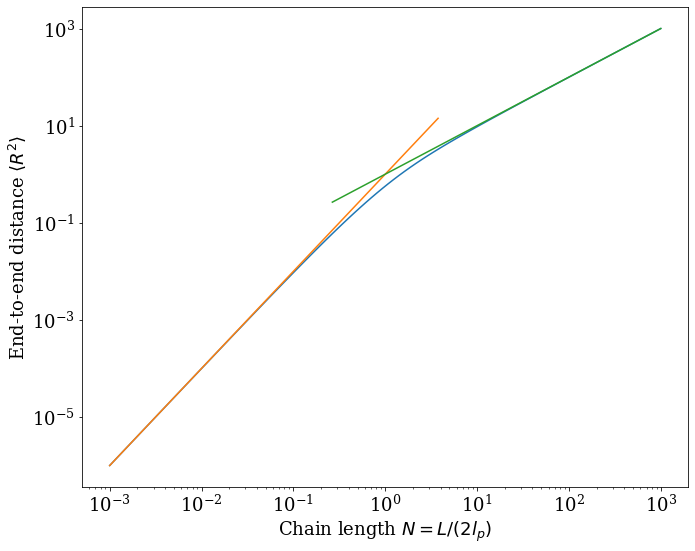

In [4]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.loglog(length_kuhn, r2)
plt.loglog(length_kuhn[0:60], r2short[0:60])        # Short length asymptotic solution
plt.loglog(length_kuhn[40:100], r2long[40:100]) # Long length asymptotic solution
plt.xlabel(r'Chain length $N = L/(2l_{p})$')
plt.ylabel(r'End-to-end distance $\langle R^{2} \rangle$')
plt.tight_layout()
plt.show()

Example usage of the 'rg2_ave' function within 'wlcave' module

In [5]:
num_pts = 100
length_kuhn_0 = 1e-3
length_kuhn_f = 1e3
length_kuhn = np.logspace(np.log10(length_kuhn_0), np.log10(length_kuhn_f), num_pts)
dimensions = 3
rg2 = wlcave.rg2_ave(length_kuhn, dimensions)
rg2short = length_kuhn ** 2 / 12
rg2long = length_kuhn / (3 * (dimensions - 1))

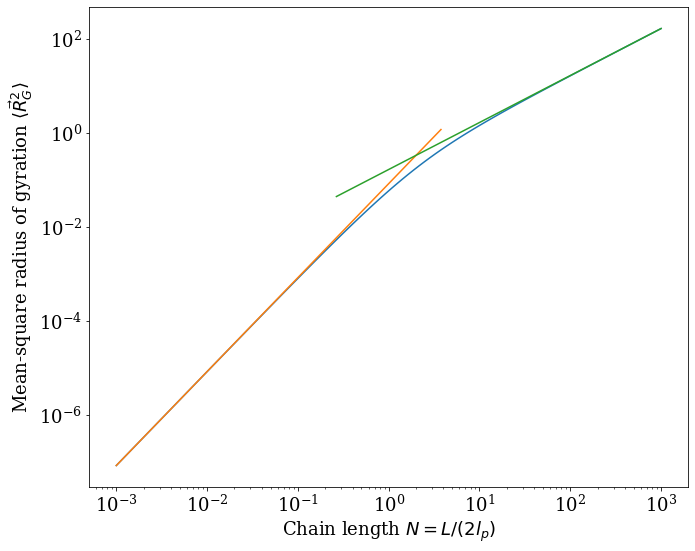

In [6]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.loglog(length_kuhn, rg2)
plt.loglog(length_kuhn[0:60], rg2short[0:60])        # Short length asymptotic solution
plt.loglog(length_kuhn[40:100], rg2long[40:100]) # Long length asymptotic solution
plt.xlabel(r'Chain length $N = L/(2l_{p})$')
plt.ylabel(r'Mean-square radius of gyration $\langle \vec{R}_{G}^{2} \rangle$')
plt.tight_layout()
plt.show()

Example usage of 'rz4_ave' function within 'wlcave' module

In [7]:
num_pts = 100
length_kuhn_0 = 1e-3
length_kuhn_f = 1e3
length_kuhn = np.logspace(np.log10(length_kuhn_0), np.log10(length_kuhn_f), num_pts)
dimensions = 3
rz4 = wlcave.rz4_ave(length_kuhn, dimensions)
rz4short = length_kuhn ** 4 * 3 / (dimensions * (dimensions + 2))
rz4long = length_kuhn ** 2 * 12 / (dimensions * (dimensions - 1)) ** 2

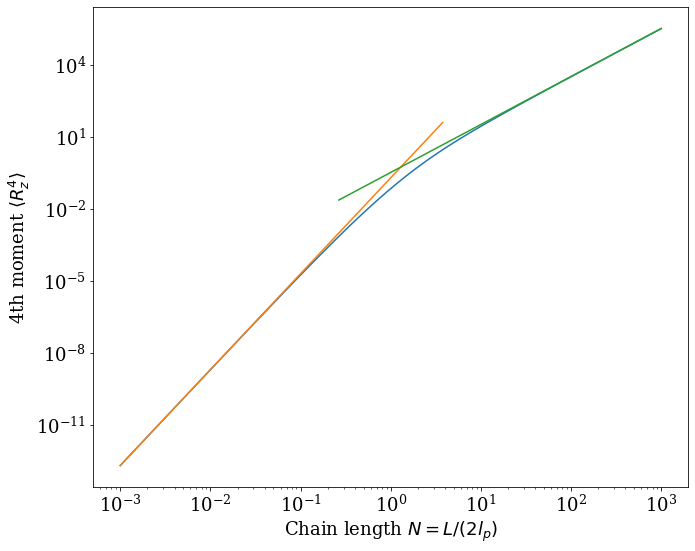

In [8]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.loglog(length_kuhn, rz4)
plt.loglog(length_kuhn[0:60], rz4short[0:60])        # Short length asymptotic solution
plt.loglog(length_kuhn[40:100], rz4long[40:100]) # Long length asymptotic solution
plt.xlabel(r'Chain length $N = L/(2l_{p})$')
plt.ylabel(r'4th moment $\langle R_{z}^{4} \rangle$')
plt.tight_layout()
plt.show()

Example usage of 'eval_poles_and_residues' function within 'wlcgreen' module

In [72]:
num_k = 100
k_val_0 = 1e-1
k_val_f = 1e5
k_val = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
mu=10
dimensions = 5

num_poles = min(20, 26-mu)
poles = np.zeros((num_k, num_poles), dtype=type(1 + 1j))

for i_k_val in range(num_k):
    poles_k_val, resi_k_val = wlcgreen.eval_poles_and_residues(k_val[i_k_val],mu,dimensions)
    for i_pole in range(num_poles):
        poles[i_k_val, i_pole] = poles_k_val[i_pole]

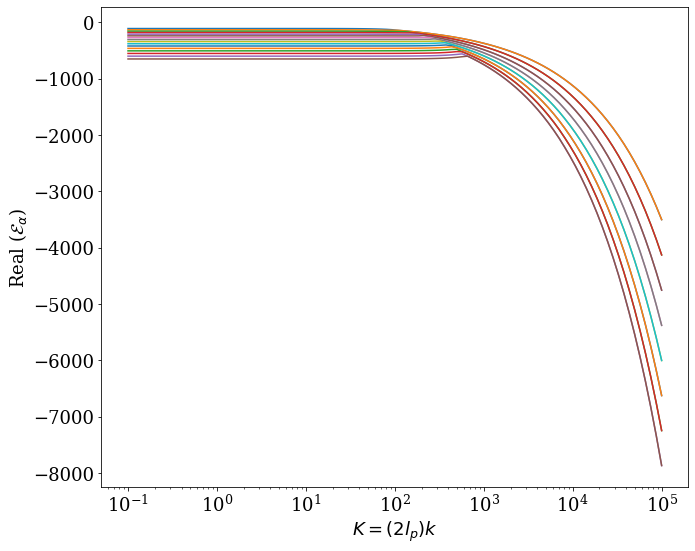

In [73]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i_pole in range(num_poles):
    plt.semilogx(k_val, np.real(poles[:, i_pole]))
    
plt.xlabel(r'$K = (2l_{p}) k$')
plt.ylabel(r'Real ($\mathcal{E}_{\alpha}$)')
plt.tight_layout()
plt.show()

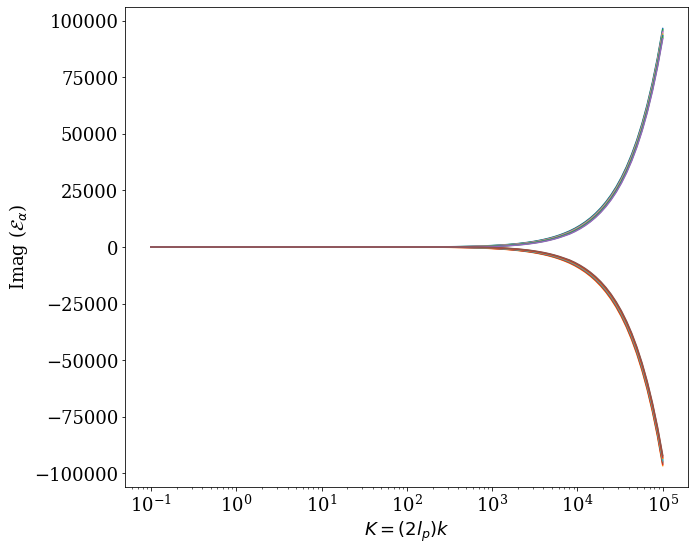

In [74]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i_pole in range(num_poles):
    plt.semilogx(k_val, np.imag(poles[:, i_pole]))

plt.xlabel(r'$K = (2l_{p}) k$')
plt.ylabel(r'Imag ($\mathcal{E}_{\alpha}$)')
plt.tight_layout()
plt.show()

In [70]:
num_k = 100
k_val_0 = 1e-4
k_val_f = 1e6
k_val = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
mu=0
dimensions = 3
num_poles = 25

num_poles = min(num_poles, 26-mu)
poles = np.zeros((num_k, num_poles), dtype=type(1 + 1j))
residues = np.zeros((num_k, num_poles), dtype=type(1 + 1j))

for i_k_val in range(num_k):
    poles_k_val, resi_k_val = wlcgreen.eval_poles_and_residues(k_val[i_k_val],mu,True,False,dimensions)
    for i_pole in range(num_poles):
        poles[i_k_val, i_pole] = poles_k_val[i_pole]
        residues[i_k_val, i_pole] = resi_k_val[0, 0, i_pole]

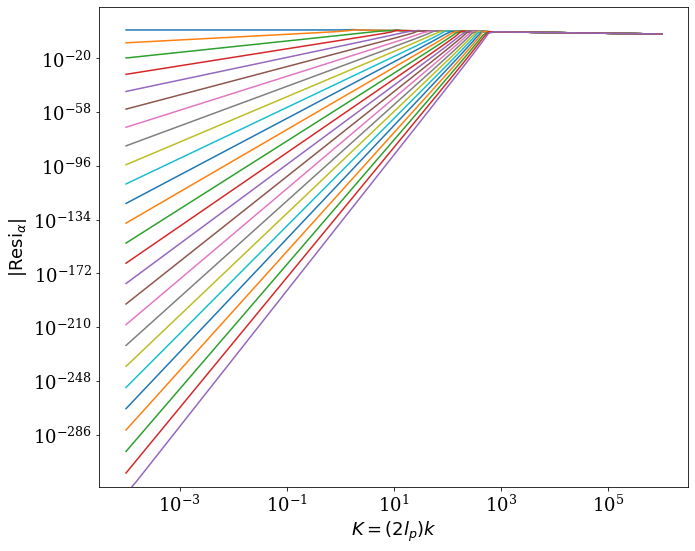

In [71]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i_pole in range(num_poles):
    plt.loglog(k_val, np.real(abs(residues[:, i_pole])))

plt.xlabel(r'$K = (2l_{p}) k$')
plt.ylabel(r'$| \mathrm{Resi}_{\alpha} |$')
plt.tight_layout()
plt.show()

In [10]:
r_val = np.linspace(0,1,500)
#n_val = np.linspace(0.1,1,10)
n_val = 0.5
g_wlc_val = wlcgreen.gwlc_r(r_val, n_val)

KeyboardInterrupt: 

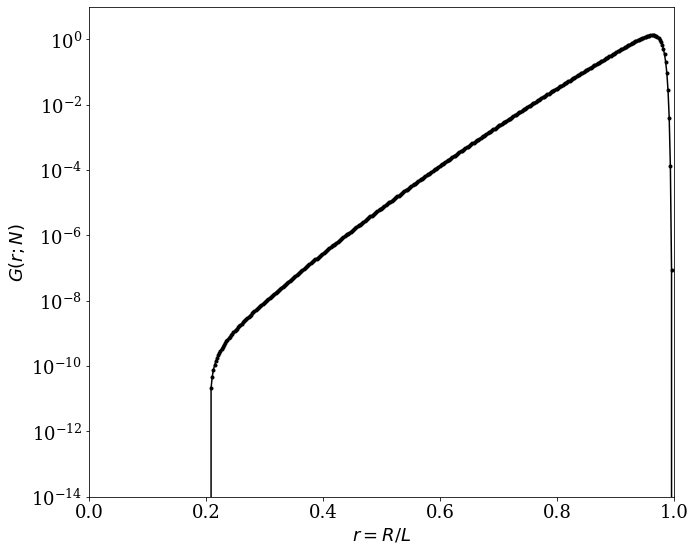

In [13]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.semilogy(r_val, np.real(g_wlc_val[:, 1]),'k.-')

plt.xlabel(r'$r = R/L$')
plt.ylabel(r'$G(r;N)$')
plt.ylim((1e-14, 1e1))
plt.xlim((0, 1))
plt.tight_layout()
plt.show()

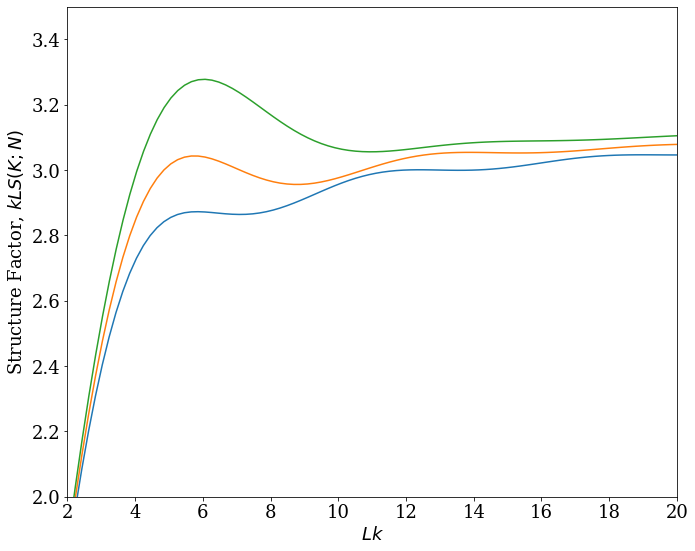

In [22]:
num_k = 100
k_val_0 = 1e-2
k_val_f = 20
length_kuhn_vec = np.array([0.1, 0.5, 1])
dimensions = 3

plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for ind_length in range(0, len(length_kuhn_vec)):
    length_kuhn = float(length_kuhn_vec[ind_length])
    k_val = np.linspace(k_val_0, k_val_f / length_kuhn, num_k)
    structure_factor = wlcstruc.eval_structure_factor(k_val, length_kuhn, dimensions)
    plt.plot(k_val * length_kuhn, np.real(structure_factor * k_val * length_kuhn),'-')
    
plt.xlabel(r'$Lk$')
plt.ylabel(r'Structure Factor, $k L S(K;N)$')
plt.ylim((2, 3.5))
plt.xlim((2, 20))
plt.tight_layout()
plt.show()    
    

Example of 'rouse' module

In [2]:
num_t = 100
t_val_0 = 1e-4
t_val_f = 1e6
t_val = np.logspace(np.log10(t_val_0), np.log10(t_val_f), num_t)
N=100
Ndel=25

mscdl = poly_dyn.linear_mscd(t_val, 1, Ndel, N, 1, 20000)
mscdr = poly_dyn.ring_mscd(t_val, 1, Ndel, N, 1, 20000)
msd = poly_dyn.linear_mid_msd(t_val, 1, N, 1, 10000)

mscdl_inf = 2 * 2 * Ndel
mscdr_inf = 2 * 1 / (1 / (2 * Ndel) + 1  / (N - 2 * Ndel))

In [32]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.loglog(t_val, mscdl)
plt.loglog(t_val, mscdr)

plt.loglog(t_val, 2 * msd)
plt.loglog(t_val, 2 * 6 * t_val /N)
plt.loglog(t_val, mscdl_inf + 0*t_val)
plt.loglog(t_val, mscdr_inf + 0*t_val)

plt.xlabel(r'$t$')
plt.ylabel(r'$MSCD$')
plt.tight_layout()
plt.show()

NameError: name 't_val' is not defined

<Figure size 720x576 with 0 Axes>

In [26]:
num_connect, loc_connect = poly_dyn.calc_connections(10)

In [27]:
num_connect
loc_connect

array([0.69717337, 0.46119774, 0.24479129, 0.78534263, 0.02829441,
       0.5014896 , 0.97732472, 0.27823698, 0.15353461, 0.55399517,
       0.60966868, 0.95763156, 0.88288644])

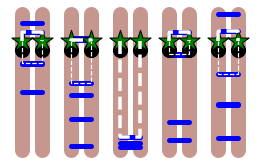

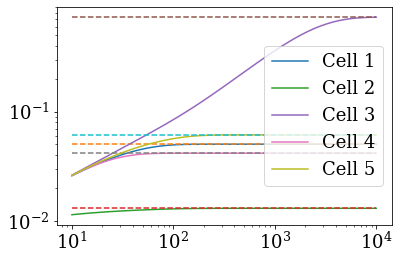

In [97]:
importlib.reload(poly_dyn)
mu = 4
cells = [poly_dyn.generate_example_cell(mu) for i in range(5)]

ax, all_closest_links = poly_dyn.draw_cells(cells)

t = np.logspace(1,4,50).astype(float)

plt.figure()
for i, linkages in enumerate(cells):
    plt.loglog(t, poly_dyn.model_mscd(t,linkages),label = 'Cell ' + str(i+1))
    plt.loglog(t, np.ones(len(t)) * poly_dyn.model_plateau(linkages),'--')

plt.legend()


In [87]:
cells[0]

array([16.89486168])

In [67]:
poly_dyn.ura_locus_frac * poly_dyn.chrv_size_effective_um

13.961828422876948

In [70]:
ndel = (Out[67] - Out[66][2]) / poly_dyn.kuhn_length
n = 2 * (Out[66][3] - Out[66][2]) / poly_dyn.kuhn_length
2 * poly_dyn.kuhn_length ** 2/ (1/(2*ndel) + 1/(n-2*ndel))

0.06327549358905404

In [33]:
importlib.reload(wlc_lcpoly)
length_kuhn = 10
gamma = 10
m_val = wlc_lcpoly.m_lcpoly(length_kuhn,gamma)
m_val


0.4607649994881058

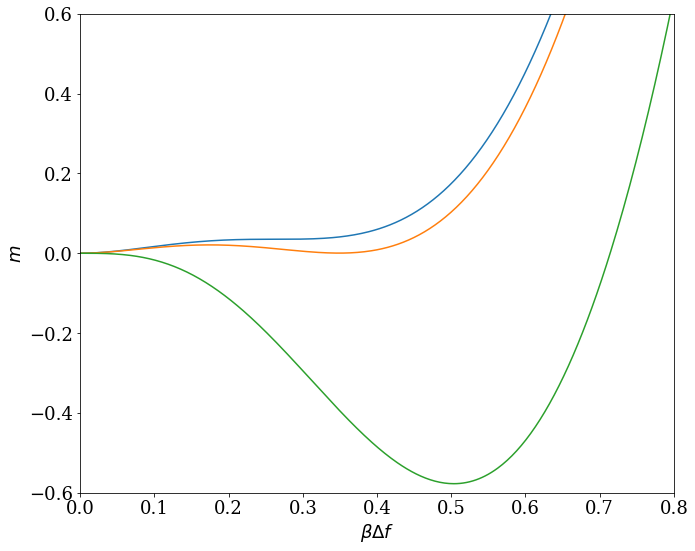

In [49]:
lam_0 = 0
lam_f = 25
n_lam = 500
lam_vec = np.linspace(lam_0, lam_f, n_lam)
length_kuhn = 3.333

plt.figure(figsize=(10,8))

kappa_vec = np.array([20.7582, 21.0606, 23.6844])
for i_kap in range(len(kappa_vec)):
    kappa = kappa_vec[i_kap]

    m_val = np.zeros(n_lam)
    q_val = np.zeros(n_lam)
    f_val = np.zeros(n_lam)
    for i_lam in range(n_lam):
        lam = lam_vec[i_lam]
        q_val[i_lam] = wlc_lcpoly.q_lcpoly(length_kuhn,lam)
        m_val[i_lam] = lam / kappa
        f_val[i_lam] = kappa * length_kuhn * m_val[i_lam] ** 2 / 3 - np.log(q_val[i_lam])
    plt.plot(m_val, f_val,'-')
    
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

    
plt.ylabel(r'$\beta \Delta f$')
plt.xlabel(r'$m$')
plt.ylim((-0.6, 0.6))
plt.xlim((0, 0.8))
plt.tight_layout()
plt.show()

In [98]:
importlib.reload(poly_confine)



<module 'wlcstat.poly_confine' from '/Users/ajspakow/Documents/Simulation/spakowitz/github/wlcstat-twist/wlcstat/wlcstat/poly_confine.py'>

In [102]:
delta = 100.
length_kuhn = 100
a = 1
b = 1

r2 = poly_confine.eval_r2_surf(delta, length_kuhn, b, a, 1000)
print(r2)


0.9991890245698404


In [116]:
delta = 0.005
length_kuhn = 0.01
a = 20
b = 1

r2 = poly_confine.eval_r2_free(delta, length_kuhn, b, a, 800)
print(r2)
print(a ** 2 * 3 / 5)

238.89696246637416
240.0


In [85]:
n = 10
n0 = 6
print(4 * n * n0 * (-1) ** n * (-1) ** n0 / (n ** 2 - n0 ** 2) ** 2 / np.pi ** 2)
#print(1/6 - 1/(4*np.pi ** 2 * n ** 2))

0.005936788104043229
